<a href="https://colab.research.google.com/github/radioroy/directionFinding/blob/master/IQ_to_angle_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function

import glob
import math
import os

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

mnist_dataframe = pd.read_csv(
  "https://raw.githubusercontent.com/radioroy/directionFinding/master/rdf_training_50_1000.csv",
  sep=",",
  header=None)

# Use just the first 10,000 records for training/validation.
mnist_dataframe = mnist_dataframe.head(10000)

mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
mnist_dataframe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
8310,8,105,85,62,38,15,4,19,44,69,95,118,147,171,159,166,198,220,246,252,234,210,185,163,138,111,89,67,44,24,6,8,26,45,66,82,102,115,148,204,...,248,244,220,231,224,193,171,145,118,93,71,46,22,3,5,29,50,74,93,114,141,159,180,197,218,232,252,241,189,170,157,142,129,109,100,89,79,69,58,51
1389,1,168,162,157,151,148,143,143,140,140,137,138,138,140,141,143,145,149,165,166,157,151,144,135,120,109,99,87,78,64,51,37,24,10,7,18,30,51,63,87,...,12,6,13,9,14,17,12,153,234,215,236,234,245,243,238,229,216,207,194,181,167,155,141,122,105,93,71,59,35,27,1,28,145,145,115,104,81,69,47,32
177,0,150,150,160,162,173,177,185,189,194,198,199,210,133,85,99,92,98,99,103,106,111,116,123,132,143,150,157,165,175,189,197,217,222,247,242,254,211,35,15,...,72,62,170,238,217,229,224,231,232,236,241,244,249,248,248,239,233,222,212,201,189,176,164,150,134,113,100,134,158,170,192,209,229,243,244,224,204,180,161,137


Apply angle algorithm to raw iq data:

(10000, 49)

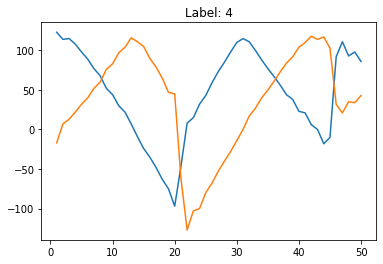

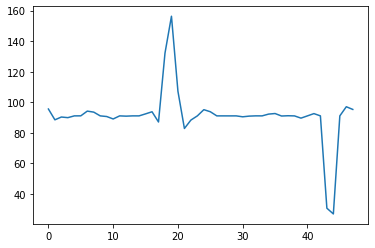

In [3]:
import random
#get random lib
from scipy.signal import medfilt
#import median filter lib

myarray = mnist_dataframe.to_numpy()
#array to store nums

Labels = myarray[:,0]
#lables are fist columb
Idata = myarray[:,1:51]-128
#i data is colubs 1 to 50
Qdata = myarray[:,51:101]-128
#q data is colubs 51 to 100
# "-128" makes data +-

N=random.randint(0,10000)
#returns a num between 0 and 10,000 in var n

_, ax = plt.subplots()
ax.plot(np.arange(1,51),Idata[N,:],np.arange(1,51),Qdata[N,:])
ax.set_title("Label: %i" % Labels[N])

Phase = np.arctan2(Idata,Qdata)
#ardtan2 on the whole array

deltaPhase = Phase[:,0:48] - Phase[:,2:50]
#subtracting values 2 steps away(to compensate for samples taken mid-shift)
deltaPhase = np.remainder(deltaPhase+np.pi, 2*np.pi)-np.pi
#remander funct (like modulo) 
deltaPhase = deltaPhase - medfilt(deltaPhase,(1,7))
deltaPhase = (deltaPhase*180/np.pi + 128)*128/180

_, ax = plt.subplots()
ax.plot(deltaPhase[N,:])

outp = np.concatenate((Labels.reshape((10000,1)), deltaPhase), 1)
outp.shape

#plt.figure(figsize=(60,600))
#plt.imshow(deltaPhase)



In [0]:
from google.colab import files
np.savetxt("angle_data.csv",outp,fmt='%f', delimiter=",")
files.download('angle_data.csv')